## Print and Export Data to Excel

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Import data set
cancer = load_breast_cancer()

# Transform to Panda data frame
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
print(df.head())

# Write to Excel
# writer = pd.ExcelWriter('breast_cancer.xlsx')
# df.to_excel(writer,'Cancer')
# writer.save()

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0          

## Statistical Key Figures

In [3]:
# Five Number Statistics
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

## Determine Skewness of Target Variable

Ratio 357 / 212 is acceptable, we will survey counter-measures for skewed data in chapter on debugging.

In [10]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

## Check for duplicate entries
Duplicate entries can spoil your evaluation

In [11]:
df[df.duplicated(keep=False)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


## Randomly Split into Train and Test Data

In [5]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% test set
train, test = train_test_split(df, test_size=0.2)

# Separate target and features
X_train = train.drop('target', axis=1)
X_test = test.drop('target', axis=1)

y_train = train.target
y_test = test.target


## Normalization

You must not use min-max normalization here - why?
Remember to always determine normalization parameters on the training set.

In [6]:
# Determine mean and std on training set
mean = X_train.mean()
std = X_train.std()

# Normalize feature tables by Z-score
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


## Apply k-NN Algorithm for different k > 0

This uses unweighted k-NN with majority voting for prediction and accuracy for quality measurement.<br/>
Note: we should rather use cross-validation due to the limited amount of data.
Cross-validation will be introduced in the chapter on evaluation.

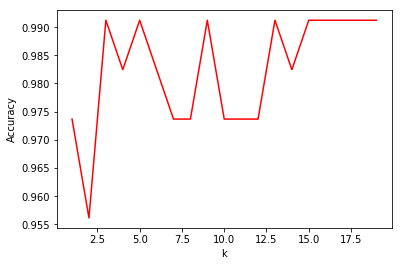

In [7]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

u_scores = []
k_range = list(range(1,20))

for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    u_scores.append(acc)
    # print("Test Set Accuracy for k=" + str(k) + ": {:.2f}".format(acc))
    
plt.plot(k_range, u_scores, color="red")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()    
    

## Apply weighted k-NN Algorithm for different k > 0

This uses weighted k-NN for prediction and accuracy for quality measurement.<br/>
Note: we should rather use cross-validation due to the limited amount of data. 
Cross-validation will be introduced in the chapter on evaluation.

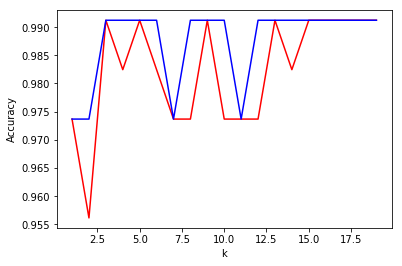

In [8]:
w_scores = []

for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    w_scores.append(acc)
    # print("Test Set Accuracy for k=" + str(k) + ": {:.2f}".format(acc))
    
plt.plot(k_range, u_scores, color="red")
plt.plot(k_range, w_scores, color="blue")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()    

## Apply k-NN Algorithm for different k > 0 with Recall instead of Accuracy

One might argue that a false-negative result (= undetected cancer) is much more harmful than a false-positive result (healthy patient get cancer diagnose). In this case we should rather measure recall instead of accuracy.

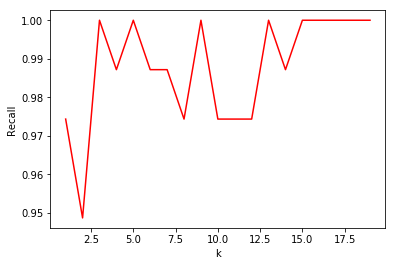

In [12]:
from sklearn.metrics import recall_score

r_scores = []

for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rec = recall_score(y_test, y_pred)
    r_scores.append(rec)
    # print("Test Set Recall for k=" + str(k) + ": {:.2f}".format(rec))
    
plt.plot(k_range, r_scores, color="red")
plt.xlabel('k')
plt.ylabel('Recall')
plt.show() 

## The Need for Cross-Validation

Execute the complete code in this notebook several times in order to obtain different training and test sets (Cell -> Run All). You will observe very different performance graphs for accuracy as well as recall. This is because we do not have enough data for this simple evaluation workflow. In the chapter of evaluation, we will look into a more appropriate techniques called k-fold and leave-one-out cross-validation. Also, we will later see how hyper-parameter optimization (like finding the best k in k-NN) can be automated by combining cross-validation with grid search.